In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
#Loading data
titanic_dataset = pd.read_csv("/home/neosoft/Documents/CSVFiles/titanic_train.csv")

In [3]:
#Getting first five rows of the dataset
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister

Parent = mother, father.

Child = daughter, son, stepdaughter, stepson.

Some children travelled only with a nanny, therefore parch=0 for them.

Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [4]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#displays size of the dataset
titanic_dataset.shape

(891, 12)

In [7]:
titanic_dataset['Survived'].unique()

array([0, 1])

In [8]:
titanic_dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
titanic_dataset['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
titanic_dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
titanic_dataset['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [12]:
len(titanic_dataset['Ticket'].unique())

681

In [13]:
len(titanic_dataset['Cabin'].unique())

148

In [14]:
titanic_dataset['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
numerical_data = titanic_dataset[['Age', 'SibSp', 'Parch', 'Fare']]
numerical_data.head()

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


In [16]:
categorical_data = titanic_dataset[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']] 
categorical_data.head()

,Survived,Pclass,Sex,Ticket,Cabin,Embarked
0,0,3,male,A/5 21171,NaN,S
1,1,1,female,PC 17599,C85,C
2,1,3,female,STON/O2. 3101282,NaN,S
3,1,1,female,113803,C123,S
4,0,3,male,373450,NaN,S


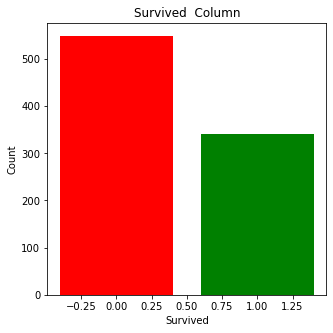

In [17]:
#Plotting bar graph for Survived column
plt.figure(figsize=(5, 5))

#Red color represents how many died and green color represents how many survived
plt.bar(list(titanic_dataset['Survived'].value_counts().keys()), list(titanic_dataset['Survived'].value_counts()), color=['red', 'green'])

plt.title("Survived  Column")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

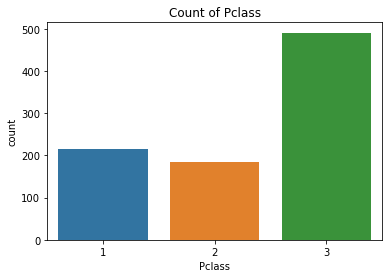

In [18]:
#The count plot can be thought of as a histogram across a categorical variable.
sb.countplot(x = titanic_dataset['Pclass'])
plt.title('Count of Pclass')
plt.show()

Pclass (Ordinal Feature) vs Survived

In [19]:
#Group the dataset by Pclass and Survived and then unstack them
grouped_data = titanic_dataset.groupby(['Pclass', 'Survived'])
print(grouped_data.size())
pclass_survived = grouped_data.size().unstack()
print(pclass_survived)

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


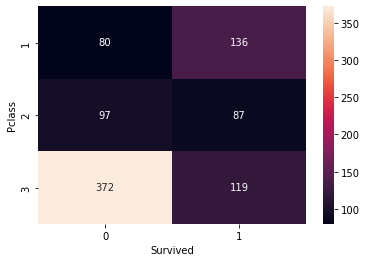

In [20]:
#Heatmap - Color encoded 2D representation of data
#To put the respective values in the boxes use the annot parameter of this function
sb.heatmap(pclass_survived, annot = True, fmt = 'd')
plt.show()

It helps in finding if higher-class passengers had more survival rate than the lower class ones or vice versa. By observing heatmap Class 1 passengers have a higher survival chance compared to classes 2 and 3. Therefore, passenger class helps in determining if one is going to survive or not.

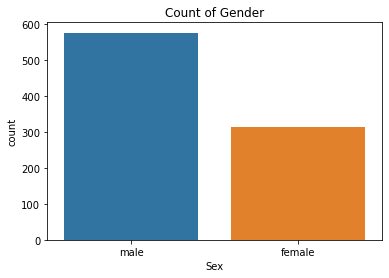

In [21]:
sb.countplot(x = titanic_dataset['Sex'])
plt.title('Count of Gender')
plt.show()

Gender (Binary Feature) Vs Survived

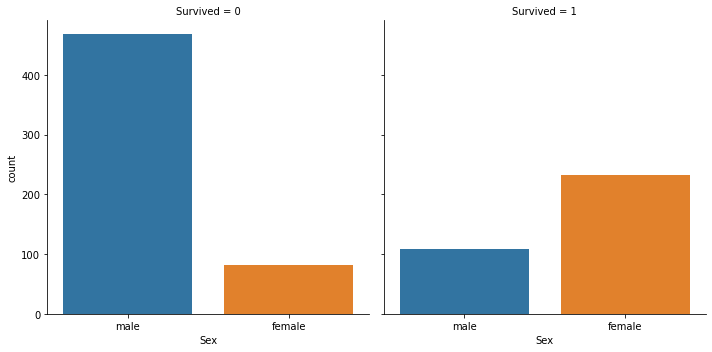

In [22]:
#Factorplot is renamed as catplot
sb.catplot(x ='Sex', col ='Survived', kind='count', data=titanic_dataset)
plt.show()

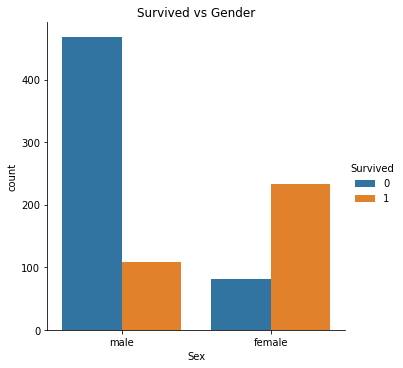

In [23]:
sb.catplot(x ='Sex', hue ='Survived', kind='count', data=titanic_dataset)
plt.title('Survived vs Gender')
plt.show()

Just by observing the graph, the survival rate of men is less than women. Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

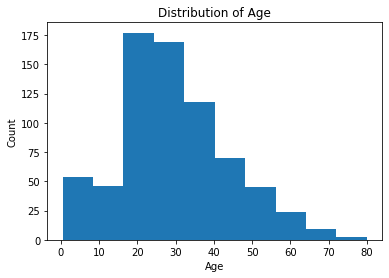

In [24]:
#Plotting bar graph for Age column
plt.hist(titanic_dataset['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel("Count")
plt.show()

Age (Continuous Feature) vs Survived

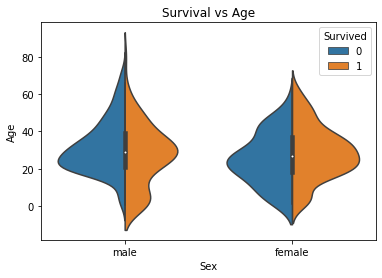

In [25]:
# Violin plots also like boxplots summarize numeric data over a set of categories.
# Violinplot displays distribution of data across all levels of a category.
sb.violinplot(x ="Sex", y ="Age", hue ="Survived", data = titanic_dataset, split = True)
plt.title('Survival vs Age')
plt.show()

The graph gives a summary of the age range of men, women and children who were saved. The survival rate is good for children, high for women in the age range 20-50 and less for men as the age increases.

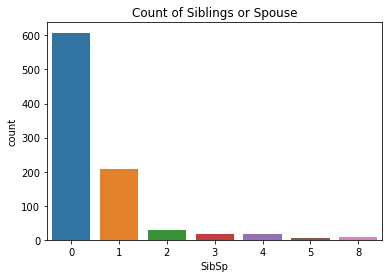

In [26]:
sb.countplot(x=titanic_dataset['SibSp'])
plt.title('Count of Siblings or Spouse')
plt.show()

Survived vs Sibing or Spouse 

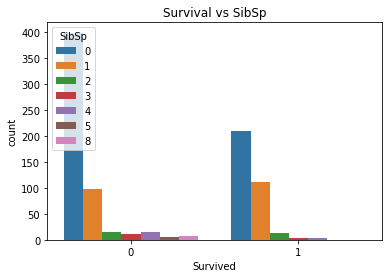

In [27]:
sb.countplot(x=titanic_dataset['Survived'],hue=titanic_dataset['SibSp'])
plt.title('Survival vs SibSp')
plt.show()

Survived vs Parent or Child

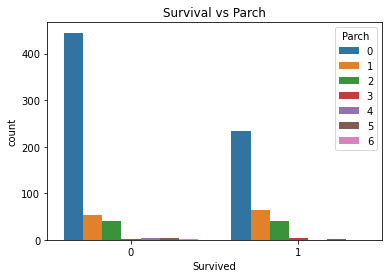

In [28]:
sb.countplot(x=titanic_dataset['Survived'],hue=titanic_dataset['Parch'])
plt.title('Survival vs Parch')
plt.show()

/home/neosoft/Downloads/PREFIX=/home/neosoft/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/neosoft/Downloads/PREFIX=/home/neosoft/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


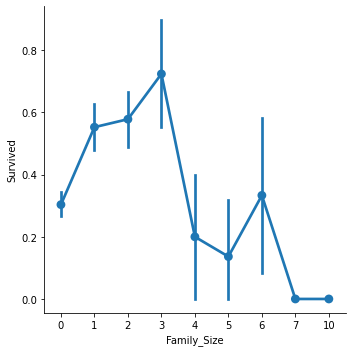

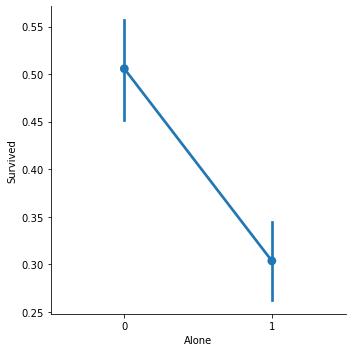

In [29]:
# Adding a column Family_Size
titanic_dataset['Family_Size'] = 0
titanic_dataset['Family_Size'] = titanic_dataset['SibSp'] + titanic_dataset['Parch']
 
# Adding a column Alone
titanic_dataset['Alone'] = 0
titanic_dataset.loc[titanic_dataset.Family_Size == 0, 'Alone'] = 1
 
# Factorplot for Family_Size
sb.factorplot(x ='Family_Size', y ='Survived', data = titanic_dataset)
 
# Factorplot for Alone
sb.factorplot(x ='Alone', y ='Survived', data = titanic_dataset)

The Family_Size denotes the number of people in a passenger’s family. It is calculated by adding the SibSp and Parch columns of a respective passenger. 
Also, another column Alone is added to check the chances of survival of a lone passenger against the one with a family.

By observing the graph, if a passenger is alone, the survival rate is less and if the family size is greater than 3, chances of survival decrease considerably.

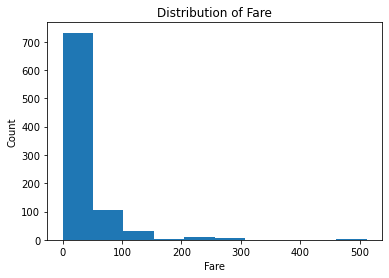

In [30]:
#Plotting bar graph for Fare column
plt.hist(titanic_dataset['Fare'])
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

Fair vs Class

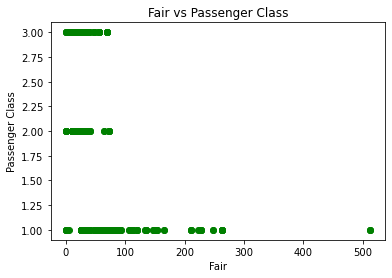

In [31]:
plt.scatter(titanic_dataset['Fare'],titanic_dataset['Pclass'],color="Green")
plt.title('Fair vs Passenger Class')
plt.xlabel('Fair')
plt.ylabel('Passenger Class')
plt.show()

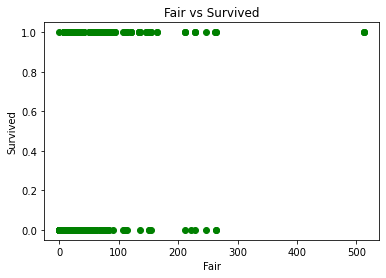

In [32]:
plt.scatter(titanic_dataset['Fare'],titanic_dataset['Survived'],color="Green")
plt.title('Fair vs Survived')
plt.xlabel('Fair')
plt.ylabel('Survived')
plt.show()

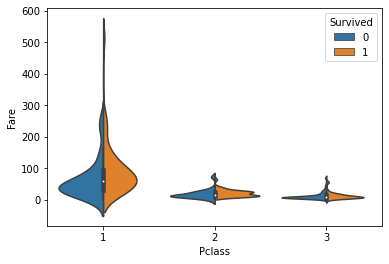

In [33]:
sb.violinplot(x ="Pclass", y ="Fare", hue ="Survived", data = titanic_dataset, split = True)
plt.show()

Fare denotes the fare paid by a passenger. It can be concluded that if a passenger paid a higher fare, the survival rate is more.

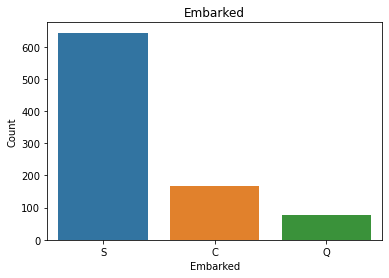

In [34]:
sb.countplot(x=titanic_dataset['Embarked'])
plt.title('Embarked')
plt.ylabel('Count')
plt.show()

Survived vs Embarked

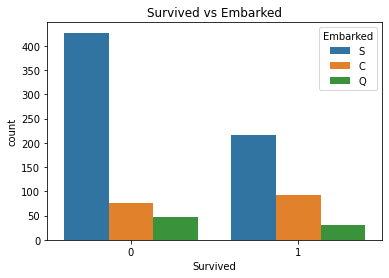

In [35]:
sb.countplot(x=titanic_dataset['Survived'],hue=titanic_dataset['Embarked'])
plt.title('Survived vs Embarked')
plt.show()

The passengers boarded from C are more survived compared to S and Q.

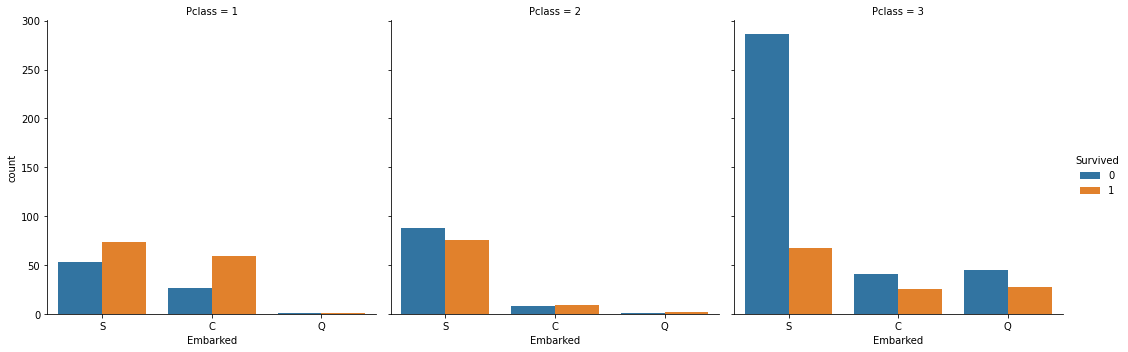

In [36]:
sb.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = titanic_dataset)
plt.show()

From the graph, the majority of the passengers boarded from S. So, the missing values can be filled with S.

The survival rate of passengers who boarded from S in passenger class 3 has low compared to passengers who boarded from S in passenger class 2 and 3.

The PassengerId, Name, Ticket and Cabin columns are dropped. Because are strings, cannot be categorized and don’t contribute much to the outcome. 

In [37]:
#Removing PassengerId, Name, Ticket, Cabin, SibSp and Parch Columns from the dataset
titanic_dataset.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace=True)

In [38]:
titanic_dataset.head(20)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_Size,Alone
0,0,3,male,22.0,7.2500,S,1,0
1,1,1,female,38.0,71.2833,C,1,0
2,1,3,female,26.0,7.9250,S,0,1
3,1,1,female,35.0,53.1000,S,1,0
4,0,3,male,35.0,8.0500,S,0,1
5,0,3,male,NaN,8.4583,Q,0,1
6,0,1,male,54.0,51.8625,S,0,1
7,0,3,male,2.0,21.0750,S,4,0
8,1,3,female,27.0,11.1333,S,2,0
9,1,2,female,14.0,30.0708,C,1,0


In [39]:
titanic_dataset.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Embarked         2
Family_Size      0
Alone            0
dtype: int64

In [40]:
#Filling null values of Age with highest value
titanic_dataset['Age'].fillna(titanic_dataset['Age'].mode()[0],inplace=True)

#Filling null values of Embarked with highest value
titanic_dataset['Embarked'].fillna(titanic_dataset['Embarked'].mode()[0],inplace=True)

In [41]:
titanic_dataset.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_Size    0
Alone          0
dtype: int64

In [42]:
titanic_dataset['Sex'].replace({'male':1,'female':0},inplace=True)

In [43]:
titanic_dataset['Embarked'].replace({'S':0,'C':1,'Q':2},inplace=True)

In [44]:
titanic_dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_Size,Alone
0,0,3,1,22.0,7.2500,0,1,0
1,1,1,0,38.0,71.2833,1,1,0
2,1,3,0,26.0,7.9250,0,0,1
3,1,1,0,35.0,53.1000,0,1,0
4,0,3,1,35.0,8.0500,0,0,1


In [45]:
x = titanic_dataset.iloc[:,1:]
y = titanic_dataset.iloc[:,:1]

In [46]:
print(x.head(), y.head())

   Pclass  Sex   Age     Fare  Embarked  Family_Size  Alone
0       3    1  22.0   7.2500         0            1      0
1       1    0  38.0  71.2833         1            1      0
2       3    0  26.0   7.9250         0            0      1
3       1    0  35.0  53.1000         0            1      0
4       3    1  35.0   8.0500         0            0      1    Survived
0         0
1         1
2         1
3         1
4         0


Splitting the dataset into the Training Set and Test Set

In [47]:
# 623 rows are in train set and 268 rows in test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=44)

In [48]:
x_train.shape

(623, 7)

In [49]:
y_test.shape

(268, 1)

# Building Decision Tree Classifier Model

In [50]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [51]:
#Predicting the values
y_pred = dtc_model.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1])

Making the Confusion Matrix

In [52]:
#from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[120  44]
 [ 30  74]]


Here we have two classes which are 0 represents not survived and 1 represents survived 

121 - correct predictions of class 0
43 - incorrect predictions of class 1
34 - incorrect predictions of class 0
70 - correct predictions of class 1

Accuracy

In [53]:
accuracy_score(y_test, y_pred) * 100

72.38805970149254

# Building Logistic Regression Model

In [54]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(x_train,y_train)

/home/neosoft/Downloads/PREFIX=/home/neosoft/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/neosoft/Downloads/PREFIX=/home/neosoft/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
pred = log_model.predict(x_test)

Making the Confusion Matrix

In [56]:
cm = confusion_matrix(y_test, pred)
print(cm)

[[128  36]
 [ 29  75]]


Here we have two classes which are 0 represents not survived and 1 represents survived 

128 - correct predictions of class 0
36 - incorrect predictions of class 1
29 - incorrect predictions of class 0
75 - correct predictions of class 1

In [57]:
accuracy_score(y_test,pred) * 100

75.74626865671642